In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos=pd.read_csv("zoo.csv")

datos.head()
#Ddatasheet
datos.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,7.000000


In [3]:

# carga del conjunto de los datos zoo
data = pd.read_csv('zoo.csv')

# clasificacion 
X = data.drop(['animal_name', 'class_type'], axis=1)  # Características
y = data['class_type']  # Etiquetas

#conjunto de entrenamiento al 70% y prueba al 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

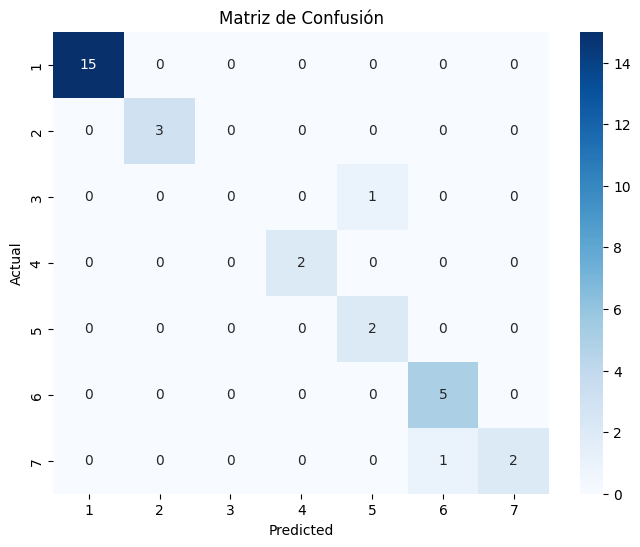

In [8]:
from sklearn.metrics import confusion_matrix

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Mostrar la matriz de confusión como mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [10]:
# Crear un DataFrame con las instancias a predecir
animals_to_predict = pd.DataFrame({
    "hair": [0, 1, 1, 0, 0, 0],
    "feathers": [0, 1, 0, 0, 0, 0],
    "eggs": [1, 1, 0, 1, 1, 1],
    "milk": [0, 0, 1, 0, 0, 0],
    "airborne": [1, 1, 0, 0, 0, 0],
    "aquatic": [0, 0, 0, 1, 0, 1],
    "predator": [0, 0, 1, 1, 1, 1],
    "toothed": [0, 0, 1, 1, 1, 1],
    "backbone": [0, 1, 1, 1, 1, 0],
    "breathes": [1, 1, 1, 1, 1, 1],
    "venomous": [0, 0, 0, 1, 0, 1],
    "fins": [0, 0, 0, 1, 0, 0],
    "legs": [6, 2, 2, 0, 4, 100],
    "tail": [0, 1, 1, 1, 1, 0],
    "domestic": [0, 1, 0, 0, 0, 0]
}, index=["Mariposa", "Canario", "Mono", "Tiburón", "Lagarto", "Cien pies"])

# Predecir las clases
predictions = model.predict(animals_to_predict)

# Imprimir las predicciones
for animal_name, prediction in zip(animals_to_predict.index, predictions):
    print(f'{animal_name}: Valor de clasificacion de la especie: {prediction}')

Mariposa: Valor de clasificacion de la especie: 6
Canario: Valor de clasificacion de la especie: 2
Mono: Valor de clasificacion de la especie: 1
Tiburón: Valor de clasificacion de la especie: 4
Lagarto: Valor de clasificacion de la especie: 3
Cien pies: Valor de clasificacion de la especie: 6


In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Cargar los datos
data = pd.read_csv('zoo.csv')

# Separar las características (X) y la variable objetivo (y)
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Obtener importancia de las características
feature_importance = model.feature_importances_

# Crear un DataFrame para mostrar la importancia de cada característica
feature_importance_df = pd.DataFrame({"Caracteristica": X.columns, "Importancia": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importancia", ascending=False)

# Mostrar el DataFrame ordenado por importancia
print("Importancia de las características:")
print(feature_importance_df)


Importancia de las características:
   Caracteristica  Importancia
3            milk     0.385864
1        feathers     0.214491
11           fins     0.146592
8        backbone     0.079200
4        airborne     0.072439
5         aquatic     0.037089
12           legs     0.026078
2            eggs     0.020862
6        predator     0.017385
0            hair     0.000000
7         toothed     0.000000
9        breathes     0.000000
10       venomous     0.000000
13           tail     0.000000
14       domestic     0.000000
